## Microsoft Movie Analysis 

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import seaborn as sn
import matplotlib.pyplot as plt 

df= pd.read_csv('tn.movie_budgets.csv.gz')
df

### Imported The Data I Wished to Analyze

df= pd.read_csv('tn.movie_budgets.csv.gz') 
df

### Prepared the Budget Dataframe for Use
#### Cleaned it
#### Created net_pre_marketing to show the money made before marketing costs
#### Created earnings/cost_ratio to show how much it made compared to budget
#### Dropped all movies prior to 2010

In [2]:
budg= pd.read_csv('tn.movie_budgets.csv.gz')
budg['production_budget']=budg['production_budget'].str.replace(',','')
budg['domestic_gross']=budg['domestic_gross'].str.replace(',','')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace(',','')
budg['production_budget']=budg['production_budget'].str.replace('$','').astype('int64')
budg['domestic_gross']=budg['domestic_gross'].str.replace('$','').astype('int64')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace('$','').astype('int64')
#made sure the data was all integers in order for it to be able to sorted and analyzed
budg['net_pre_marketing']=budg['worldwide_gross']-budg['production_budget']
#made this column to indicate the best of my abilities the net profit
#it is unclear if advertising money is included(though i'm assuming it is not)
budg['domestic/world']=budg['domestic_gross']/budg['worldwide_gross']
#made this money to detirmine what percentage of worldwide earning were domestic
budg=budg.dropna()
budg['earnings/cost_ratio']=budg['net_pre_marketing']/budg['production_budget']
#this works as a percentage the movie recouperated its production budget
budg['year_released']=budg['release_date'].str[-4:].astype('int64')
#made a new column which has the year the film was released in order to be able to drop the movies made pre-2010
budg.drop(budg[budg['year_released'] < 2010].index, inplace = True)
budg.sort_values('earnings/cost_ratio').tail(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
5216,17,"Aug 23, 2013",You're Next,1000000,18494006,26887177,25887177,0.687837,25.887177,2013
4590,91,"Apr 13, 2018",Truth or Dare,3500000,41411015,95127344,91627344,0.435322,26.179241,2018
5685,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2669782,0.575785,26.697820,2017
4258,59,"Oct 19, 2012",Paranormal Activity 4,5000000,53900335,142817992,137817992,0.377406,27.563598,2012
2996,97,"Nov 26, 2010",The Kingâs Speech,15000000,138797449,430821168,415821168,0.322170,27.721411,2010
4668,69,"Oct 12, 2012",Sinister,3000000,48086903,87727807,84727807,0.548138,28.242602,2012
4254,55,"Jul 22, 2016",Lights Out,5000000,67268835,148806510,143806510,0.452056,28.761302,2016
4666,67,"Jun 7, 2013",The Purge,3000000,64473115,91266581,88266581,0.706426,29.422194,2013
5358,59,"Dec 30, 2011",Jodaeiye Nader az Simin,800000,7098492,24426169,23626169,0.290610,29.532711,2011
3755,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,285154618,0.042055,30.016276,2016


### Created a Metric for Profitability
#### Profitability actually occurs at an e/c ratio of 1, but not going to take this out for fear of consequences

In [3]:
#"in a very broad sense movies haven't made any money until
#their box office roughly equals twice the money spent on production."
#https://www.fool.com/investing/2019/08/06/why-box-office-results-dont-really-explain-how-mov.aspx#:~:text=But%20it's%20important%20to%20remember,the%20movie%20but%20marketing%20it.
#I am going to use the budget data to detirmine if a movie is profitable
#I can do this by creating a column that tells me if a movies earnings/cost ration is above 1 or not
budgP=budg
budgP['Profitable?']= np.where(budgP['earnings/cost_ratio']>= 2, True, False)
budgP.sort_values('earnings/cost_ratio')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
5302,3,"Dec 11, 2015",American Hero,1000000,0,26,-999974,0.000000,-0.999974,2015,False
4081,82,"May 21, 2010",Perrierâs Bounty,6600000,828,828,-6599172,1.000000,-0.999875,2010,False
3818,19,"May 8, 2015",Skin Trade,9000000,1242,1242,-8998758,1.000000,-0.999862,2015,False
5335,36,"Nov 21, 2014",Food Chains,913000,0,176,-912824,0.000000,-0.999807,2014,False
3161,62,"Sep 1, 2015",Broken Horses,15000000,0,3471,-14996529,0.000000,-0.999769,2015,False
...,...,...,...,...,...,...,...,...,...,...,...
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,0.477449,58.170677,2010,True
5213,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,0.509439,63.364198,2015,True
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,0.540790,65.580591,2011,True
5211,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,0.523420,100.759490,2012,True


### Imported Cleaned dataset for project usage

In [4]:
mega_table= pd.read_csv('Merge_mega_table.csv')
mega_table.sort_values('worldwide_gross')

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
136,247,tt1763303,6.9,62589.0,The First Time,2012,95.0,"Comedy,Drama,Romance",67.0,"Oct 19, 2012",2000000.0,17061.0,17061.0,-1982939.0,1.000000,-0.991470,2012.0,False
160,316,tt2059171,6.3,29550.0,13 Sins,2014,93.0,"Horror,Thriller",51.0,"Apr 18, 2014",4000000.0,9134.0,47552.0,-3952448.0,0.192084,-0.988112,2014.0,False
188,405,tt2398249,5.5,19832.0,They Came Together,2014,83.0,"Comedy,Romance",58.0,"Jun 27, 2014",3000000.0,0.0,82780.0,-2917220.0,0.000000,-0.972407,2014.0,False
249,586,tt4995790,7.2,44239.0,The Square,2017,151.0,"Comedy,Drama",100.0,"Oct 25, 2013",1500000.0,124244.0,176262.0,-1323738.0,0.704883,-0.882492,2013.0,False
36,53,tt1183923,7.0,22210.0,Welcome to the Rileys,2010,110.0,Drama,12.0,"Oct 29, 2010",10000000.0,152857.0,355919.0,-9644081.0,0.429471,-0.964408,2010.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,432,tt2582846,7.7,315135.0,The Fault in Our Stars,2014,126.0,"Drama,Romance",43.0,"Jun 6, 2014",12000000.0,124872350.0,307166834.0,295166834.0,0.406529,24.597236,2014.0,True
21,28,tt0970866,5.5,99222.0,Little Fockers,2010,98.0,"Comedy,Romance",70.0,"Dec 22, 2010",100000000.0,148438600.0,310650574.0,210650574.0,0.477831,2.106506,2010.0,True
60,100,tt1343092,7.3,433165.0,The Great Gatsby,2013,143.0,"Drama,Romance",70.0,"May 10, 2013",190000000.0,144840419.0,351040419.0,161040419.0,0.412603,0.847581,2013.0,False
237,560,tt4465564,4.6,81706.0,Fifty Shades Darker,2017,118.0,"Drama,Romance",91.0,"Feb 10, 2017",55000000.0,114434010.0,381398492.0,326398492.0,0.300038,5.934518,2017.0,True


In [5]:
best_margin=mega_table.sort_values('earnings/cost_ratio', ascending=False).head(20)
best_margin.value_counts('genres')

genres
Horror,Thriller         6
Drama,Romance           4
Drama                   4
Horror                  2
Comedy,Drama            2
Comedy,Drama,Romance    1
Comedy                  1
dtype: int64

<AxesSubplot:xlabel='production_budget', ylabel='earnings/cost_ratio'>

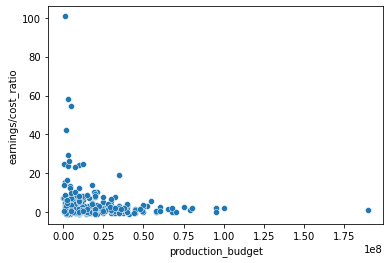

In [6]:
sn.scatterplot(data=mega_table, x="production_budget", y="earnings/cost_ratio")

In [7]:
mega_table2

NameError: name 'mega_table2' is not defined

In [8]:
mega_table2= pd.read_csv('Merge_mega_table2.csv')
most_exp=mega_table2.sort_values('production_budget', ascending = False).head(30)
best_margin=mega_table2.sort_values('earnings/cost_ratio', ascending = False).head(30)

<AxesSubplot:xlabel='earnings/cost_ratio', ylabel='production_budget'>

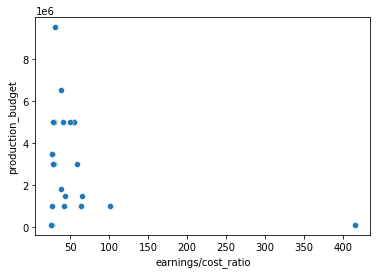

In [9]:
sn.scatterplot(data=best_margin, x="earnings/cost_ratio", y="production_budget")

In [10]:
#due to microsoft being a mjor player financially, it would make sense for their film budget to be similar to other feature films
#being so, I'm going to filter the movies in the dataset to movies that cost over $70 mil to make, which was described as the low end of a feature film
#https://parlaystudios.com/blog/feature-film-budget-breakdown/
feature_films=mega_table2.loc[mega_table2['production_budget']>=50000000]
#feature_films.drop_duplicates(subset=['movie'])
feature_films
#some of the movie values appear suspecct, but should not have a greater impact on entire df

,movie,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
2,The Secret Life of Walter Mitty,tt0359950,7.3,275300.0,2013,114.0,"Adventure,Comedy,Drama",37.0,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,9.686118e+07,0.309999,1.064409,2013.0,True,Dec
4,Jurassic World,tt0369610,7.0,539338.0,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09,0.395590,6.669092,2015.0,True,Jun
7,Tangled,tt0398286,7.8,366366.0,2010,100.0,"Adventure,Animation,Comedy",15.0,"Nov 24, 2010",260000000.0,200821936.0,5.864772e+08,3.264772e+08,0.342421,1.255682,2010.0,True,Nov
8,John Carter,tt0401729,6.6,241792.0,2012,132.0,"Action,Adventure,Sci-Fi",14.0,"Mar 9, 2012",275000000.0,73058679.0,2.827781e+08,7.778100e+06,0.258360,0.028284,2012.0,False,Mar
9,Dinner for Schmucks,tt0427152,5.9,91546.0,2010,114.0,Comedy,51.0,"Jul 30, 2010",69000000.0,73026337.0,8.679650e+07,1.779650e+07,0.841351,0.257920,2010.0,False,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,Home,tt8601408,8.4,32.0,2018,71.0,"Drama,Romance,Thriller",44.0,"Mar 27, 2015",130000000.0,177397510.0,3.859979e+08,2.559979e+08,0.459582,1.969215,2015.0,True,Mar
1901,Red,tt8851190,8.1,26.0,2018,90.0,Drama,63.0,"Oct 15, 2010",60000000.0,90380162.0,1.964397e+08,1.364397e+08,0.460091,2.273995,2010.0,True,Oct
1902,Joy,tt8917752,6.5,430.0,2018,99.0,Drama,88.0,"Dec 25, 2015",60000000.0,56451232.0,1.011341e+08,4.113406e+07,0.558182,0.685568,2015.0,False,Dec
1905,Unstoppable,tt9225192,6.5,576.0,2018,116.0,"Action,Crime",19.0,"Nov 12, 2010",95000000.0,81562942.0,1.657209e+08,7.072092e+07,0.492170,0.744431,2010.0,False,Nov


In [11]:
most_prev=feature_films.value_counts('genres').head(20)
top20=most_prev.index
most_prev.index

Index(['Adventure,Animation,Comedy', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Fantasy', 'Action,Adventure,Drama',
       'Action,Adventure,Comedy', 'Action,Adventure,Animation', 'Drama',
       'Comedy', 'Adventure,Family,Fantasy', 'Action,Adventure,Thriller',
       'Documentary', 'Action,Comedy,Crime', 'Action,Crime,Thriller',
       'Action,Thriller', 'Action,Drama,Thriller', 'Adventure,Comedy,Family',
       'Action,Drama,Sci-Fi', 'Crime,Drama,Mystery', 'Action,Adventure,Family',
       'Thriller'],
      dtype='object', name='genres')

In [12]:
feature_top20=feature_films.loc[feature_films['genres'].isin(top20)]
genre_dict=dict(feature_top20.groupby('genres').net_pre_marketing.mean())
sort_genre_mean = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted=dict(sort_genre_mean)

In [13]:
feature_top20

,movie,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
4,Jurassic World,tt0369610,7.0,539338.0,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09,0.395590,6.669092,2015.0,True,Jun
7,Tangled,tt0398286,7.8,366366.0,2010,100.0,"Adventure,Animation,Comedy",15.0,"Nov 24, 2010",260000000.0,200821936.0,5.864772e+08,3.264772e+08,0.342421,1.255682,2010.0,True,Nov
8,John Carter,tt0401729,6.6,241792.0,2012,132.0,"Action,Adventure,Sci-Fi",14.0,"Mar 9, 2012",275000000.0,73058679.0,2.827781e+08,7.778100e+06,0.258360,0.028284,2012.0,False,Mar
9,Dinner for Schmucks,tt0427152,5.9,91546.0,2010,114.0,Comedy,51.0,"Jul 30, 2010",69000000.0,73026337.0,8.679650e+07,1.779650e+07,0.841351,0.257920,2010.0,False,Jul
10,The A-Team,tt0429493,6.8,235256.0,2010,117.0,"Action,Adventure,Thriller",32.0,"Jun 11, 2010",110000000.0,77222099.0,1.772412e+08,6.724117e+07,0.435689,0.611283,2010.0,False,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,The Great Wall,tt7535780,6.5,24.0,2017,72.0,Documentary,92.0,"Feb 17, 2017",150000000.0,45157105.0,3.344869e+08,1.844869e+08,0.135004,1.229912,2017.0,True,Feb
1882,Tomorrowland,tt7728220,6.3,7.0,2017,70.0,Documentary,23.0,"May 22, 2015",170000000.0,93436322.0,2.066275e+08,3.662752e+07,0.452197,0.215456,2015.0,False,May
1901,Red,tt8851190,8.1,26.0,2018,90.0,Drama,63.0,"Oct 15, 2010",60000000.0,90380162.0,1.964397e+08,1.364397e+08,0.460091,2.273995,2010.0,True,Oct
1902,Joy,tt8917752,6.5,430.0,2018,99.0,Drama,88.0,"Dec 25, 2015",60000000.0,56451232.0,1.011341e+08,4.113406e+07,0.558182,0.685568,2015.0,False,Dec


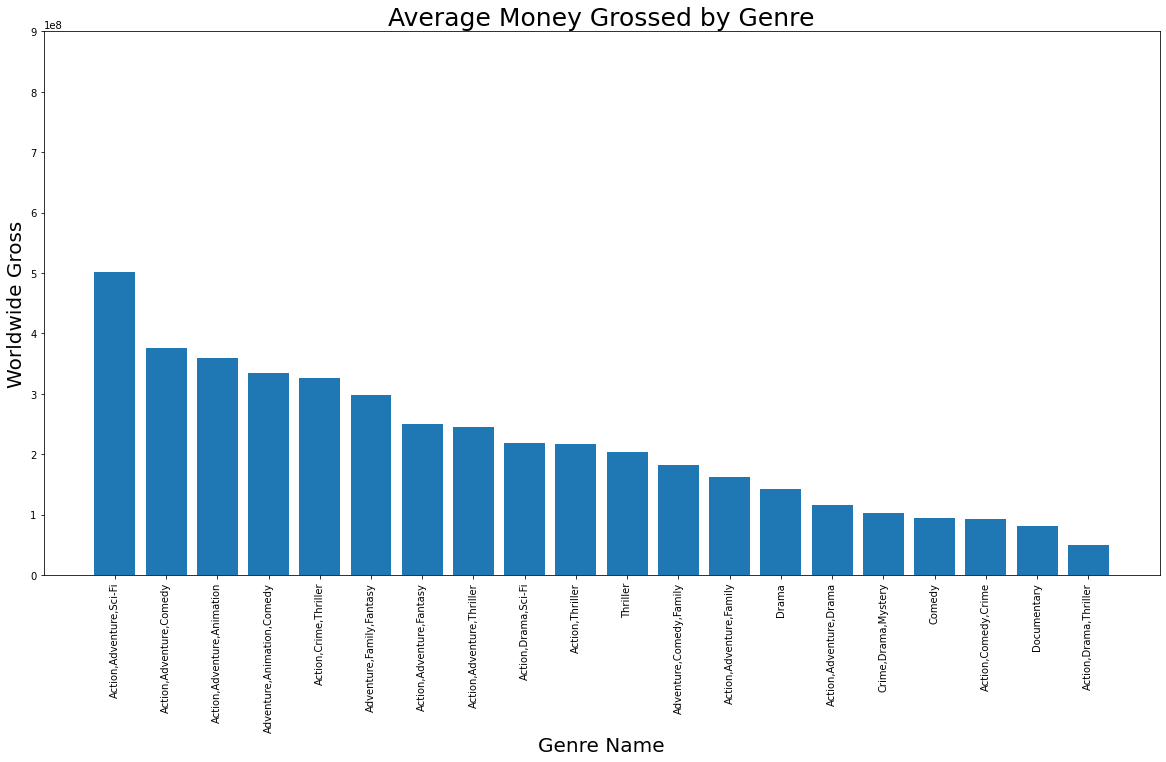

In [14]:
x = genre_mean_sorted.keys()
y = genre_mean_sorted.values()
plot_one_fig, plot_one_ax= plt.subplots(figsize=(20, 10))
plot_one_ax.set_title('Average Money Grossed by Genre', fontsize=25)
plot_one_ax.set_ylabel('Worldwide Gross', fontsize=20)
plot_one_ax.set_xlabel('Genre Name', fontsize=20)
plot_one_ax.bar(x,y)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1000000000, 100000000));


In [15]:
actadvensci=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Sci-Fi']
actadvensci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4 to 1838
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                50 non-null     object 
 1   tconst               50 non-null     object 
 2   averagerating        50 non-null     float64
 3   numvotes             50 non-null     float64
 4   start_year           50 non-null     int64  
 5   runtime_minutes      50 non-null     float64
 6   genres               50 non-null     object 
 7   id                   50 non-null     float64
 8   release_date         50 non-null     object 
 9   production_budget    50 non-null     float64
 10  domestic_gross       50 non-null     float64
 11  worldwide_gross      50 non-null     float64
 12  net_pre_marketing    50 non-null     float64
 13  domestic/world       50 non-null     float64
 14  earnings/cost_ratio  50 non-null     float64
 15  year_released        50 non-null     flo

In [16]:
actadvencom=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Comedy']
actadvencom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 19 to 1742
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                18 non-null     object 
 1   tconst               18 non-null     object 
 2   averagerating        18 non-null     float64
 3   numvotes             18 non-null     float64
 4   start_year           18 non-null     int64  
 5   runtime_minutes      18 non-null     float64
 6   genres               18 non-null     object 
 7   id                   18 non-null     float64
 8   release_date         18 non-null     object 
 9   production_budget    18 non-null     float64
 10  domestic_gross       18 non-null     float64
 11  worldwide_gross      18 non-null     float64
 12  net_pre_marketing    18 non-null     float64
 13  domestic/world       18 non-null     float64
 14  earnings/cost_ratio  18 non-null     float64
 15  year_released        18 non-null     fl

In [17]:
actadvenani=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Animation']
actadvenani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 20 to 1600
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                15 non-null     object 
 1   tconst               15 non-null     object 
 2   averagerating        15 non-null     float64
 3   numvotes             15 non-null     float64
 4   start_year           15 non-null     int64  
 5   runtime_minutes      15 non-null     float64
 6   genres               15 non-null     object 
 7   id                   15 non-null     float64
 8   release_date         15 non-null     object 
 9   production_budget    15 non-null     float64
 10  domestic_gross       15 non-null     float64
 11  worldwide_gross      15 non-null     float64
 12  net_pre_marketing    15 non-null     float64
 13  domestic/world       15 non-null     float64
 14  earnings/cost_ratio  15 non-null     float64
 15  year_released        15 non-null     fl

In [18]:
feature_top20['month_released']=feature_top20['release_date'].str[:3]


<ipython-input-18-b04bc0a7de21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_top20['month_released']=feature_top20['release_date'].str[:3]


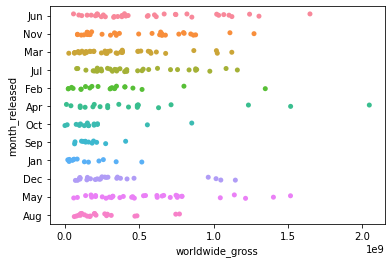

In [19]:
ax = sn.stripplot(x="worldwide_gross", y="month_released", data=feature_top20)

In [20]:
mega_table2['month_released']=mega_table2['release_date'].str[:3]
period1=['Jan','Feb','Mar','Apr']
period_1=mega_table2.loc[mega_table2['month_released'].isin(period1)]
period2=['May','Jun','Jul','Aug']
period_2=mega_table2.loc[mega_table2['month_released'].isin(period2)]
period3=['Sep','Oct','Nov','Dec']
period_3=mega_table2.loc[mega_table2['month_released'].isin(period3)]

In [21]:
period_1[period_1['numvotes']>= 10000]

,movie,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
1,On the Road,tt0337692,6.1,37886.0,2012,124.0,"Adventure,Drama,Romance",17.0,"Mar 22, 2013",25000000.0,720828.0,9313302.0,-15686698.0,0.077398,-0.627468,2013.0,False,Mar
6,The Three Stooges,tt0383010,5.1,28570.0,2012,92.0,"Comedy,Family",4.0,"Apr 13, 2012",30000000.0,44338224.0,54052249.0,24052249.0,0.820285,0.801742,2012.0,False,Apr
8,John Carter,tt0401729,6.6,241792.0,2012,132.0,"Action,Adventure,Sci-Fi",14.0,"Mar 9, 2012",275000000.0,73058679.0,282778100.0,7778100.0,0.258360,0.028284,2012.0,False,Mar
15,Alita: Battle Angel,tt0437086,7.5,88207.0,2019,122.0,"Action,Adventure,Sci-Fi",24.0,"Feb 14, 2019",170000000.0,85710210.0,402976036.0,232976036.0,0.212693,1.370447,2019.0,True,Feb
19,Shazam!,tt0448115,7.4,109051.0,2019,132.0,"Action,Adventure,Comedy",97.0,"Apr 5, 2019",85000000.0,139606856.0,362899733.0,277899733.0,0.384698,3.269409,2019.0,True,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,Us,tt6857112,7.1,102511.0,2019,116.0,"Horror,Mystery,Thriller",88.0,"Mar 22, 2019",20000000.0,175006930.0,254210310.0,234210310.0,0.688434,11.710515,2019.0,True,Mar
1867,Unsane,tt7153766,6.4,32049.0,2018,98.0,"Drama,Horror,Mystery",70.0,"Mar 23, 2018",1500000.0,7690044.0,14244931.0,12744931.0,0.539844,8.496621,2018.0,True,Mar
1880,What Men Want,tt7634968,4.9,10141.0,2019,117.0,"Comedy,Fantasy,Romance",21.0,"Feb 8, 2019",20000000.0,54611903.0,69911903.0,49911903.0,0.781153,2.495595,2019.0,True,Feb
1889,Dragon Ball Super: Broly,tt7961060,8.0,16465.0,2018,100.0,"Action,Adventure,Animation",36.0,"Jan 16, 2019",8500000.0,30376755.0,122747755.0,114247755.0,0.247473,13.440912,2019.0,True,Jan


In [22]:
period_2[period_2['numvotes']>= 10000]
p2genres=period_2.value_counts('genres').head(20)
p2mostprev=p2genres.index
period_2_top_genres=period_2.loc[period_2['genres'].isin(p2mostprev)]

In [23]:
period_3[period_3['numvotes']>= 10000]

,movie,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
2,The Secret Life of Walter Mitty,tt0359950,7.3,275300.0,2013,114.0,"Adventure,Comedy,Drama",37.0,"Dec 25, 2013",91000000.0,58236838.0,187861183.0,96861183.0,0.309999,1.064409,2013.0,True,Dec
3,A Walk Among the Tombstones,tt0365907,6.5,105116.0,2014,114.0,"Action,Crime,Drama",67.0,"Sep 19, 2014",28000000.0,26017685.0,62108587.0,34108587.0,0.418906,1.218164,2014.0,True,Sep
5,The Rum Diary,tt0376136,6.2,94787.0,2011,119.0,"Comedy,Drama",16.0,"Oct 28, 2011",45000000.0,13109815.0,21544732.0,-23455268.0,0.608493,-0.521228,2011.0,False,Oct
7,Tangled,tt0398286,7.8,366366.0,2010,100.0,"Adventure,Animation,Comedy",15.0,"Nov 24, 2010",260000000.0,200821936.0,586477240.0,326477240.0,0.342421,1.255682,2010.0,True,Nov
12,Real Steel,tt0433035,7.1,283534.0,2011,127.0,"Action,Drama,Family",31.0,"Oct 7, 2011",110000000.0,85463309.0,263880341.0,153880341.0,0.323871,1.398912,2011.0,True,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,If Beale Street Could Talk,tt7125860,7.2,25512.0,2018,119.0,"Drama,Romance",96.0,"Dec 14, 2018",12000000.0,14915773.0,19859167.0,7859167.0,0.751077,0.654931,2018.0,False,Dec
1865,Destroyer,tt7137380,6.2,13683.0,2018,121.0,"Action,Crime,Drama",5.0,"Dec 25, 2018",9000000.0,1533324.0,3681096.0,-5318904.0,0.416540,-0.590989,2018.0,False,Dec
1875,Instant Family,tt7401588,7.4,46728.0,2018,118.0,"Comedy,Drama",20.0,"Nov 16, 2018",48000000.0,67363237.0,119736188.0,71736188.0,0.562597,1.494504,2018.0,True,Nov
1888,The Mule,tt7959026,7.1,58955.0,2018,116.0,"Crime,Drama,Thriller",100.0,"Dec 14, 2018",50000000.0,103804407.0,170857676.0,120857676.0,0.607549,2.417154,2018.0,True,Dec


<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

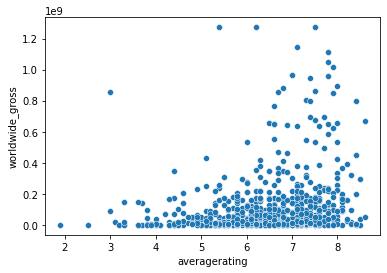

In [24]:
sn.scatterplot(data=period_3, x="averagerating", y="worldwide_gross")

In [25]:
period_2_top_genres['ec_ratio']=period_2_top_genres["earnings/cost_ratio"]

<ipython-input-25-80650c671d28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_2_top_genres['ec_ratio']=period_2_top_genres["earnings/cost_ratio"]


In [26]:
period_2_top_genres.sort_values('ec_ratio')
period_2_top_genres = period_2_top_genres.drop(1119)

In [27]:
period_2_top_genres.describe()

,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,ec_ratio
count,320.000000,3.200000e+02,320.000000,320.000000,320.000000,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,320.000000,320.000000,320.000000,320.000000
mean,6.371563,1.321516e+05,2013.837500,104.806250,50.868750,6.134569e+07,7.891484e+07,2.063965e+08,1.450509e+08,0.503036,2.693813,2013.950000,2.693813
std,0.993855,2.003022e+05,2.629439,19.595277,28.534008,7.410501e+07,1.074239e+08,3.020167e+08,2.490184e+08,0.293134,5.102112,2.518396,5.102112
min,2.400000,5.000000e+00,2010.000000,40.000000,2.000000,5.000000e+04,0.000000e+00,1.242000e+03,-2.002376e+08,0.000000,-0.999862,2010.000000,-0.999862
25%,5.800000,5.543000e+03,2011.000000,91.750000,27.000000,7.375000e+06,1.798489e+06,7.419838e+06,-4.017250e+04,0.304300,-0.012097,2012.000000,-0.012097
50%,6.400000,6.012050e+04,2014.000000,103.000000,51.000000,2.750000e+07,4.108214e+07,7.065228e+07,4.114846e+07,0.451152,1.258581,2014.000000,1.258581
75%,7.100000,1.748255e+05,2016.000000,117.000000,76.000000,1.000000e+08,1.054871e+08,2.742566e+08,1.714554e+08,0.742428,3.248681,2016.000000,3.248681
max,9.200000,1.841066e+06,2019.000000,165.000000,100.000000,4.106000e+08,6.522706e+08,1.648855e+09,1.433855e+09,1.000000,41.411721,2019.000000,41.411721


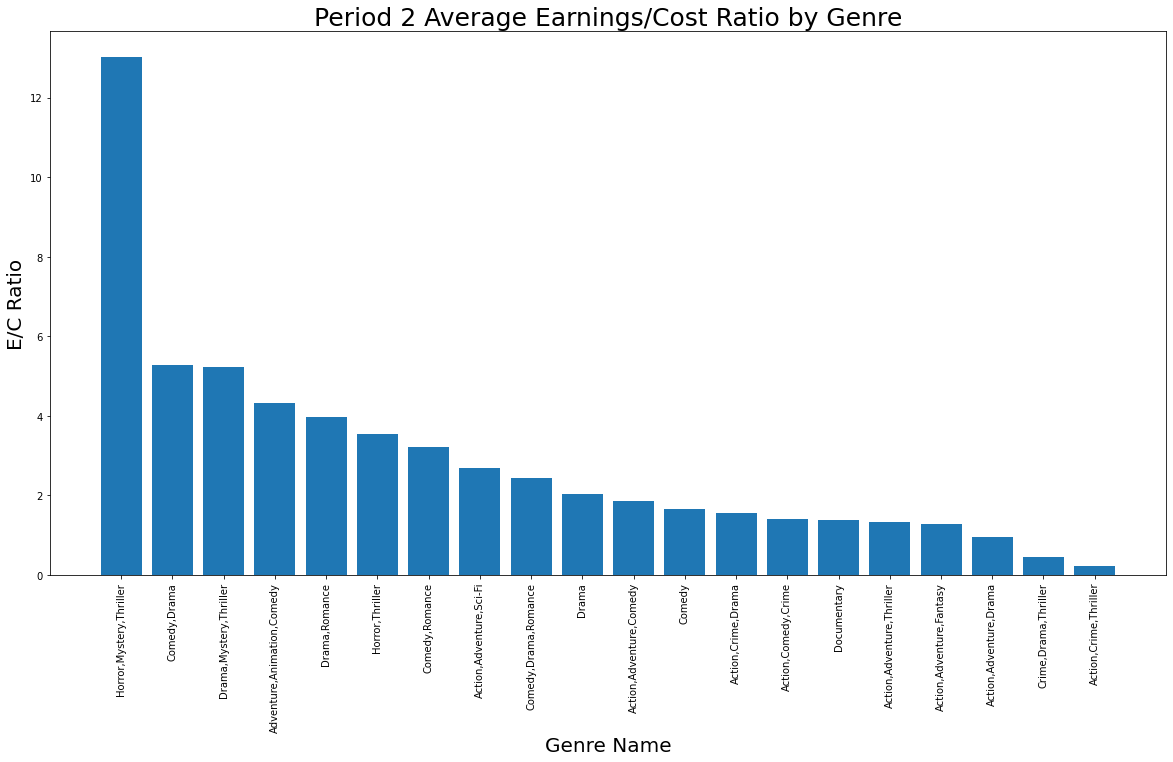

In [28]:

genre_dict2=dict(period_2_top_genres.groupby('genres').ec_ratio.mean())
sort_genre_mean2 = sorted(genre_dict2.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2=dict(sort_genre_mean2)
genre_mean_sorted2
plot_two, plot_two_ax= plt.subplots(figsize=(20, 10))
plot_two_ax.bar(genre_mean_sorted2.keys(),genre_mean_sorted2.values())
plot_two_ax.set_title('Period 2 Average Earnings/Cost Ratio by Genre', fontsize=25)
plot_two_ax.set_ylabel('E/C Ratio', fontsize=20)
plot_two_ax.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90);

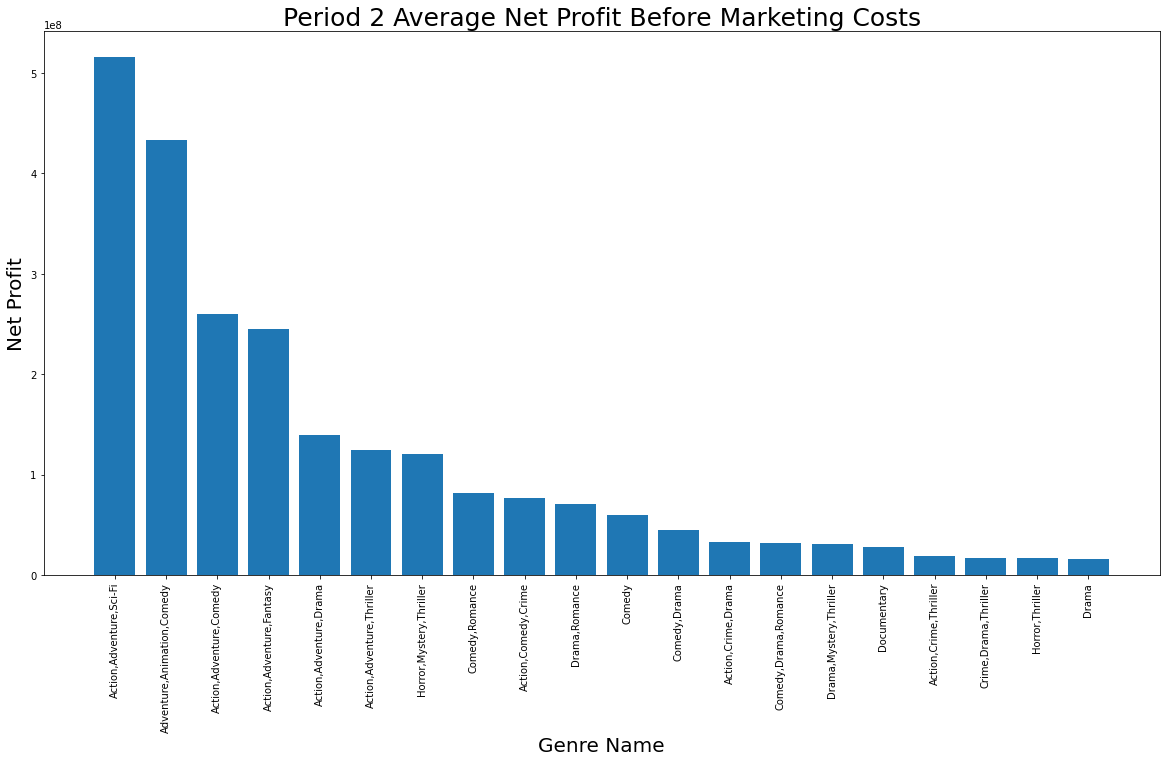

In [29]:
genre_dict2_=dict(period_2_top_genres.groupby('genres').net_pre_marketing.mean())
sort_genre_mean2_ = sorted(genre_dict2_.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2_=dict(sort_genre_mean2_)
genre_mean_sorted2_
plot_two_, plot_two_ax_= plt.subplots(figsize=(20, 10))
plot_two_ax_.bar(genre_mean_sorted2_.keys(),genre_mean_sorted2_.values())
plot_two_ax_.set_title('Period 2 Average Net Profit Before Marketing Costs', fontsize=25)
plot_two_ax_.set_ylabel('Net Profit', fontsize=20)
plot_two_ax_.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90);

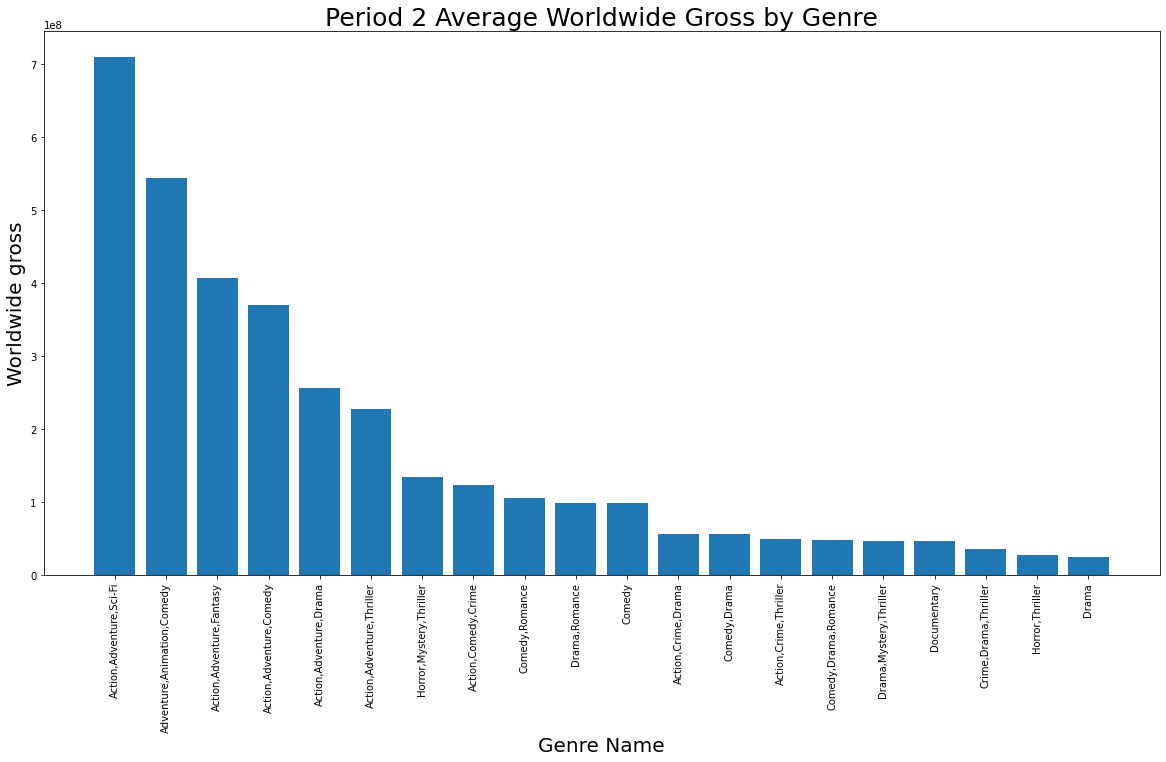

In [30]:
genre_dict2__=dict(period_2_top_genres.groupby('genres').worldwide_gross.mean())
sort_genre_mean2__ = sorted(genre_dict2__.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2__=dict(sort_genre_mean2__)
genre_mean_sorted2__
plot_two_, plot_two_ax_= plt.subplots(figsize=(20, 10))
plot_two_ax_.bar(genre_mean_sorted2__.keys(),genre_mean_sorted2__.values())
plot_two_ax_.set_title('Period 2 Average Worldwide Gross by Genre', fontsize=25)
plot_two_ax_.set_ylabel('Worldwide gross', fontsize=20)
plot_two_ax_.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90);

In [31]:
top20_genres=mega_table2.value_counts('genres').head(20)
top20_genres

genres
Drama                         131
Adventure,Animation,Comedy     69
Comedy,Drama                   65
Comedy                         63
Comedy,Drama,Romance           62
Documentary                    59
Action,Adventure,Sci-Fi        53
Drama,Romance                  52
Comedy,Romance                 47
Action,Crime,Drama             43
Action,Adventure,Fantasy       35
Horror,Mystery,Thriller        35
Action,Comedy,Crime            32
Horror,Thriller                31
Crime,Drama,Thriller           30
Drama,Thriller                 30
Action,Adventure,Drama         29
Horror                         28
Biography,Drama,History        26
Action,Crime,Thriller          24
dtype: int64

In [32]:
mega=mega_table2.loc[mega_table2['production_budget']>=50000000]

In [33]:
mega_table2_votes=mega_table2[mega_table2['numvotes']>= 10000]

In [34]:
mega_table2_votes5=mega_table2[mega_table2['numvotes']>= 1000]

In [35]:
mega_table2_votes50=mega_table2_votes.sort_values('worldwide_gross', ascending=False).head(50)

[Text(0.5, 1.0, 'Rating vs World Wide Gross')]

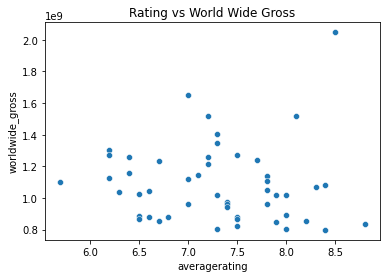

In [36]:
sn.scatterplot(data=mega_table2_votes50, x="averagerating", y="worldwide_gross").set(title='Rating vs World Wide Gross')

In [37]:
mega_table2_horrormt=mega_table2_votes5.loc[mega_table2_votes5['genres']=='Horror,Mystery,Thriller']
mega_table2_horrormt.sort_values('averagerating')

,movie,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
1763,Slender Man,tt5690360,3.2,19650.0,2018,93.0,"Horror,Mystery,Thriller",80.0,"Aug 10, 2018",10000000.0,30564825.0,51723644.0,41723644.0,0.590926,4.172364,2018.0,True,Aug
1298,Devil's Due,tt2752758,4.1,15502.0,2014,89.0,"Horror,Mystery,Thriller",14.0,"Jan 17, 2014",7000000.0,15821461.0,36146087.0,29146087.0,0.437709,4.163727,2014.0,True,Jan
1119,The Gallows,tt2309260,4.2,17763.0,2015,81.0,"Horror,Mystery,Thriller",80.0,"Jul 10, 2015",100000.0,22764410.0,41656474.0,41556474.0,0.546480,415.564740,2015.0,True,Jul
224,Ouija,tt1204977,4.5,44054.0,2014,89.0,"Horror,Mystery,Thriller",60.0,"Oct 24, 2014",5000000.0,50856010.0,103300632.0,98300632.0,0.492311,19.660126,2014.0,True,Oct
903,Exeter,tt1945044,4.5,5156.0,2015,91.0,"Horror,Mystery,Thriller",49.0,"Sep 1, 2015",25000.0,0.0,489792.0,464792.0,0.000000,18.591680,2015.0,True,Sep
1214,Paranormal Activity: The Ghost Dimension,tt2473510,4.6,22361.0,2015,88.0,"Horror,Mystery,Thriller",7.0,"Oct 23, 2015",10000000.0,18297124.0,77959374.0,67959374.0,0.234701,6.795937,2015.0,True,Oct
1007,Paranormal Activity 4,tt2109184,4.6,58408.0,2012,88.0,"Horror,Mystery,Thriller",59.0,"Oct 19, 2012",5000000.0,53900335.0,142817992.0,137817992.0,0.377406,27.563598,2012.0,True,Oct
1433,The Forest,tt3387542,4.8,36423.0,2016,93.0,"Horror,Mystery,Thriller",92.0,"Jan 8, 2016",10000000.0,26594261.0,40749230.0,30749230.0,0.652632,3.074923,2016.0,True,Jan
90,My Soul to Take,tt0872230,4.8,18381.0,2010,107.0,"Horror,Mystery,Thriller",68.0,"Oct 8, 2010",25000000.0,14744435.0,16727470.0,-8272530.0,0.881450,-0.330901,2010.0,False,Oct
540,Blair Witch,tt1540011,5.0,36867.0,2016,89.0,"Horror,Mystery,Thriller",1.0,"Sep 16, 2016",10000000.0,20777061.0,38985577.0,28985577.0,0.532942,2.898558,2016.0,True,Sep


<AxesSubplot:xlabel='production_budget', ylabel='earnings/cost_ratio'>

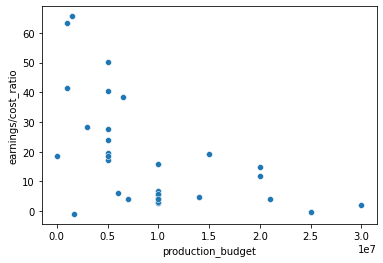

In [38]:
mega_table2_horrormt=mega_table2_horrormt.drop(1119)
sn.scatterplot(data=mega_table2_horrormt, x="production_budget", y="earnings/cost_ratio")

In [39]:
mega_table2_horrormt.describe()

,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
count,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000
mean,5.609677,86980.903226,2014.677419,95.548387,54.225806,9.280161e+06,5.261322e+07,1.094047e+08,1.001246e+08,0.465267,18.312311,2014.774194
std,1.028382,99406.559131,2.688086,10.471672,27.233202,7.383525e+06,4.501006e+07,8.794989e+07,8.653807e+07,0.181481,18.274722,2.679673
min,3.200000,1115.000000,2010.000000,80.000000,1.000000,2.500000e+04,0.000000e+00,8.074500e+04,-8.272530e+06,0.000000,-0.951358,2010.000000
25%,4.900000,35447.500000,2012.500000,88.000000,41.000000,5.000000e+06,2.368566e+07,4.725452e+07,4.156768e+07,0.367254,4.312381,2012.500000
50%,5.600000,58408.000000,2015.000000,93.000000,59.000000,7.000000e+06,3.581956e+07,8.772781e+07,6.892506e+07,0.499764,14.900007,2015.000000
75%,6.200000,96430.500000,2017.000000,103.000000,70.500000,1.000000e+07,6.044498e+07,1.339141e+08,1.289141e+08,0.544464,25.782825,2017.000000
max,7.700000,400474.000000,2019.000000,118.000000,93.000000,3.000000e+07,1.760407e+08,3.180001e+08,2.980001e+08,0.881450,65.580591,2019.000000


In [73]:
actiontableau=pd.read_csv('action_table.csv')
actiontableau

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,39,tt0369610,7.00,539338.00,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",34.00,"Jun 12, 2015",215000000.00,652270625.00,1648854864.00,1433854864.00,0.40,6.67,2015.00,True
1,50,tt0401729,6.60,241792.00,John Carter,2012,132.00,"Action,Adventure,Sci-Fi",14.00,"Mar 9, 2012",275000000.00,73058679.00,282778100.00,7778100.00,0.26,0.03,2012.00,False
2,68,tt0429493,6.80,235256.00,The A-Team,2010,117.00,"Action,Adventure,Thriller",32.00,"Jun 11, 2010",110000000.00,77222099.00,177241171.00,67241171.00,0.44,0.61,2010.00,False
3,72,tt0433035,7.10,283534.00,Real Steel,2011,127.00,"Action,Drama,Family",31.00,"Oct 7, 2011",110000000.00,85463309.00,263880341.00,153880341.00,0.32,1.40,2011.00,True
4,78,tt0437086,7.50,88207.00,Alita: Battle Angel,2019,122.00,"Action,Adventure,Sci-Fi",24.00,"Feb 14, 2019",170000000.00,85710210.00,402976036.00,232976036.00,0.21,1.37,2019.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,45547,tt5013056,7.90,466580.00,Dunkirk,2017,106.00,"Action,Drama,History",69.00,"Jul 21, 2017",150000000.00,190068280.00,499837368.00,349837368.00,0.38,2.33,2017.00,True
194,46167,tt5095030,7.10,244024.00,Ant-Man and the Wasp,2018,118.00,"Action,Adventure,Comedy",41.00,"Jul 6, 2018",130000000.00,216648740.00,623144660.00,493144660.00,0.35,3.79,2018.00,True
195,48760,tt5463162,7.80,391735.00,Deadpool 2,2018,119.00,"Action,Adventure,Comedy",15.00,"May 18, 2018",110000000.00,324591735.00,786680557.00,676680557.00,0.41,6.15,2018.00,True
196,50822,tt5758778,5.80,81193.00,Skyscraper,2018,102.00,"Action,Adventure,Thriller",78.00,"Jul 13, 2018",125000000.00,68420120.00,304115534.00,179115534.00,0.22,1.43,2018.00,True


In [41]:
horrortableau=pd.read_csv('horror_table.csv')
horrortableau

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,70,tt0431021,5.9,53649.0,The Possession,2012,92.0,"Horror,Mystery,Thriller",81.0,"Aug 31, 2012",14000000.0,49130588.0,82925064.0,68925064.0,0.592470,4.923219,2012.0,True
1,102,tt0455407,6.5,104465.0,The Crazies,2010,101.0,"Horror,Thriller",36.0,"Feb 26, 2010",19000000.0,39123589.0,56445534.0,37445534.0,0.693121,1.970818,2010.0,True
2,122,tt0464154,5.4,81327.0,Piranha 3D,2010,88.0,"Comedy,Horror",52.0,"Aug 20, 2010",24000000.0,25003155.0,83660160.0,59660160.0,0.298866,2.485840,2010.0,True
3,177,tt0498381,4.5,34151.0,Rings,2017,102.0,"Drama,Horror,Mystery",38.0,"Feb 3, 2017",25000000.0,27793018.0,82917283.0,57917283.0,0.335190,2.316691,2017.0,True
4,203,tt0780653,5.8,97873.0,The Wolfman,2010,103.0,"Drama,Fantasy,Horror",91.0,"Feb 12, 2010",150000000.0,62189884.0,142634358.0,-7365642.0,0.436009,-0.049104,2010.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,57280,tt6857112,7.1,102511.0,Us,2019,116.0,"Horror,Mystery,Thriller",88.0,"Mar 22, 2019",20000000.0,175006930.0,254210310.0,234210310.0,0.688434,11.710515,2019.0,True
158,57914,tt6998518,6.6,44378.0,Mandy,2018,121.0,"Action,Fantasy,Horror",71.0,"Sep 14, 2018",6000000.0,1214525.0,1427656.0,-4572344.0,0.850713,-0.762057,2018.0,False
159,58547,tt7153766,6.4,32049.0,Unsane,2018,98.0,"Drama,Horror,Mystery",70.0,"Mar 23, 2018",1500000.0,7690044.0,14244931.0,12744931.0,0.539844,8.496621,2018.0,True
160,61203,tt7784604,7.3,151571.0,Hereditary,2018,127.0,"Drama,Horror,Mystery",56.0,"Jun 8, 2018",10000000.0,44069456.0,70133905.0,60133905.0,0.628362,6.013390,2018.0,True


In [42]:
len(horrortableau)

162

In [43]:
horrorover3mil=horrortableau.loc[horrortableau['production_budget']>=3000000]
horrorover3mil

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,70,tt0431021,5.9,53649.0,The Possession,2012,92.0,"Horror,Mystery,Thriller",81.0,"Aug 31, 2012",14000000.0,49130588.0,82925064.0,68925064.0,0.592470,4.923219,2012.0,True
1,102,tt0455407,6.5,104465.0,The Crazies,2010,101.0,"Horror,Thriller",36.0,"Feb 26, 2010",19000000.0,39123589.0,56445534.0,37445534.0,0.693121,1.970818,2010.0,True
2,122,tt0464154,5.4,81327.0,Piranha 3D,2010,88.0,"Comedy,Horror",52.0,"Aug 20, 2010",24000000.0,25003155.0,83660160.0,59660160.0,0.298866,2.485840,2010.0,True
3,177,tt0498381,4.5,34151.0,Rings,2017,102.0,"Drama,Horror,Mystery",38.0,"Feb 3, 2017",25000000.0,27793018.0,82917283.0,57917283.0,0.335190,2.316691,2017.0,True
4,203,tt0780653,5.8,97873.0,The Wolfman,2010,103.0,"Drama,Fantasy,Horror",91.0,"Feb 12, 2010",150000000.0,62189884.0,142634358.0,-7365642.0,0.436009,-0.049104,2010.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,56894,tt6772950,5.2,33621.0,Truth or Dare,2018,100.0,"Horror,Thriller",91.0,"Apr 13, 2018",3500000.0,41411015.0,95127344.0,91627344.0,0.435322,26.179241,2018.0,True
157,57280,tt6857112,7.1,102511.0,Us,2019,116.0,"Horror,Mystery,Thriller",88.0,"Mar 22, 2019",20000000.0,175006930.0,254210310.0,234210310.0,0.688434,11.710515,2019.0,True
158,57914,tt6998518,6.6,44378.0,Mandy,2018,121.0,"Action,Fantasy,Horror",71.0,"Sep 14, 2018",6000000.0,1214525.0,1427656.0,-4572344.0,0.850713,-0.762057,2018.0,False
160,61203,tt7784604,7.3,151571.0,Hereditary,2018,127.0,"Drama,Horror,Mystery",56.0,"Jun 8, 2018",10000000.0,44069456.0,70133905.0,60133905.0,0.628362,6.013390,2018.0,True


In [44]:
horrortableau=horrortableau.round(decimals=3)
horrortableau.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,162.000000,162.000000,162.000000
mean,18132.592593,5.869753,85252.592593,2013.913580,98.888889,51.987654,1.861679e+07,3.538752e+07,7.915834e+07,6.054155e+07,0.462593,10.484191,2014.074074
std,17741.029932,0.826734,85637.136751,2.664221,11.731467,27.359577,2.913995e+07,4.522432e+07,1.047960e+08,9.196127e+07,0.247853,35.247170,2.605669
min,70.000000,3.200000,10217.000000,2010.000000,80.000000,1.000000,7.000000e+04,0.000000e+00,7.556000e+03,-1.296538e+07,0.000000,-0.998000,2010.000000
25%,2828.250000,5.300000,33381.750000,2011.250000,91.000000,31.250000,4.000000e+06,3.717054e+06,1.143136e+07,1.591438e+05,0.329000,0.039500,2012.000000
50%,11348.500000,5.900000,57796.000000,2014.000000,97.000000,54.500000,9.450000e+06,2.471731e+07,4.358745e+07,2.906583e+07,0.488000,2.307500,2014.000000
75%,31712.500000,6.400000,106295.750000,2016.000000,105.000000,73.750000,2.000000e+07,4.792146e+07,9.957262e+07,8.502316e+07,0.628750,8.406750,2016.000000
max,62412.000000,7.700000,553751.000000,2019.000000,152.000000,100.000000,1.900000e+08,3.274817e+08,6.974580e+08,6.624580e+08,1.000000,415.565000,2019.000000


In [45]:
totalhorroroverbudget=len(horrorover3mil['movie'])
totalhorroroverbudget

136

In [46]:
pd.options.display.float_format='{:.2f}'.format


In [47]:
horrortableau.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
count,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00
mean,18132.59,5.87,85252.59,2013.91,98.89,51.99,18616790.12,35387515.15,79158339.41,60541549.28,0.46,10.48,2014.07
std,17741.03,0.83,85637.14,2.66,11.73,27.36,29139949.60,45224321.85,104795979.93,91961269.03,0.25,35.25,2.61
min,70.00,3.20,10217.00,2010.00,80.00,1.00,70000.00,0.00,7556.00,-12965385.00,0.00,-1.00,2010.00
25%,2828.25,5.30,33381.75,2011.25,91.00,31.25,4000000.00,3717054.00,11431361.75,159143.75,0.33,0.04,2012.00
50%,11348.50,5.90,57796.00,2014.00,97.00,54.50,9450000.00,24717313.50,43587448.50,29065832.00,0.49,2.31,2014.00
75%,31712.50,6.40,106295.75,2016.00,105.00,73.75,20000000.00,47921458.50,99572618.50,85023157.75,0.63,8.41,2016.00
max,62412.00,7.70,553751.00,2019.00,152.00,100.00,190000000.00,327481748.00,697457969.00,662457969.00,1.00,415.56,2019.00


In [48]:
totalhorroroverbudgetsuccess=len(horrorover3mil.loc[horrorover3mil['earnings/cost_ratio']>=1])

In [49]:
totalhorroroverbudgetsuccess/totalhorroroverbudget

0.6323529411764706

In [50]:
horrorover3mil['movie' and'earnings/cost_ratio']

0      4.92
1      1.97
2      2.49
3      2.32
4     -0.05
       ... 
156   26.18
157   11.71
158   -0.76
160    6.01
161    6.13
Name: earnings/cost_ratio, Length: 136, dtype: float64

<AxesSubplot:xlabel='production_budget', ylabel='earnings/cost_ratio'>

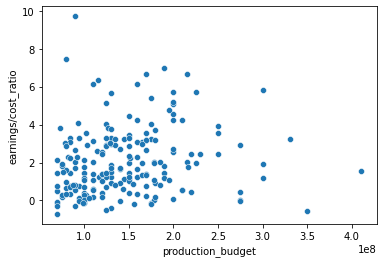

In [51]:
sn.scatterplot(data=actiontableau, x="production_budget", y="earnings/cost_ratio")

In [52]:
import matplotlib.pyplot as plt
sn.set_theme()

# Load the example flights dataset and convert to long-form
horror = sns.load_dataset("horrortableau")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

NameError: name 'sns' is not defined

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


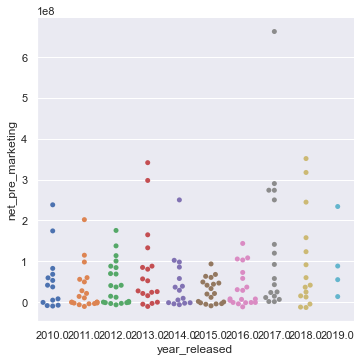

In [53]:
sn.catplot(data=horrortableau, kind="swarm", x="year_released", y="net_pre_marketing")

In [56]:
import matplotlib.colors as mcolors

In [74]:
actiontableau

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,39,tt0369610,7.00,539338.00,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",34.00,"Jun 12, 2015",215000000.00,652270625.00,1648854864.00,1433854864.00,0.40,6.67,2015.00,True
1,50,tt0401729,6.60,241792.00,John Carter,2012,132.00,"Action,Adventure,Sci-Fi",14.00,"Mar 9, 2012",275000000.00,73058679.00,282778100.00,7778100.00,0.26,0.03,2012.00,False
2,68,tt0429493,6.80,235256.00,The A-Team,2010,117.00,"Action,Adventure,Thriller",32.00,"Jun 11, 2010",110000000.00,77222099.00,177241171.00,67241171.00,0.44,0.61,2010.00,False
3,72,tt0433035,7.10,283534.00,Real Steel,2011,127.00,"Action,Drama,Family",31.00,"Oct 7, 2011",110000000.00,85463309.00,263880341.00,153880341.00,0.32,1.40,2011.00,True
4,78,tt0437086,7.50,88207.00,Alita: Battle Angel,2019,122.00,"Action,Adventure,Sci-Fi",24.00,"Feb 14, 2019",170000000.00,85710210.00,402976036.00,232976036.00,0.21,1.37,2019.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,45547,tt5013056,7.90,466580.00,Dunkirk,2017,106.00,"Action,Drama,History",69.00,"Jul 21, 2017",150000000.00,190068280.00,499837368.00,349837368.00,0.38,2.33,2017.00,True
194,46167,tt5095030,7.10,244024.00,Ant-Man and the Wasp,2018,118.00,"Action,Adventure,Comedy",41.00,"Jul 6, 2018",130000000.00,216648740.00,623144660.00,493144660.00,0.35,3.79,2018.00,True
195,48760,tt5463162,7.80,391735.00,Deadpool 2,2018,119.00,"Action,Adventure,Comedy",15.00,"May 18, 2018",110000000.00,324591735.00,786680557.00,676680557.00,0.41,6.15,2018.00,True
196,50822,tt5758778,5.80,81193.00,Skyscraper,2018,102.00,"Action,Adventure,Thriller",78.00,"Jul 13, 2018",125000000.00,68420120.00,304115534.00,179115534.00,0.22,1.43,2018.00,True


In [116]:
len(actiontableau.loc[actiontableau['ec_ratio']>=1])/len(actiontableau)

0.6717171717171717

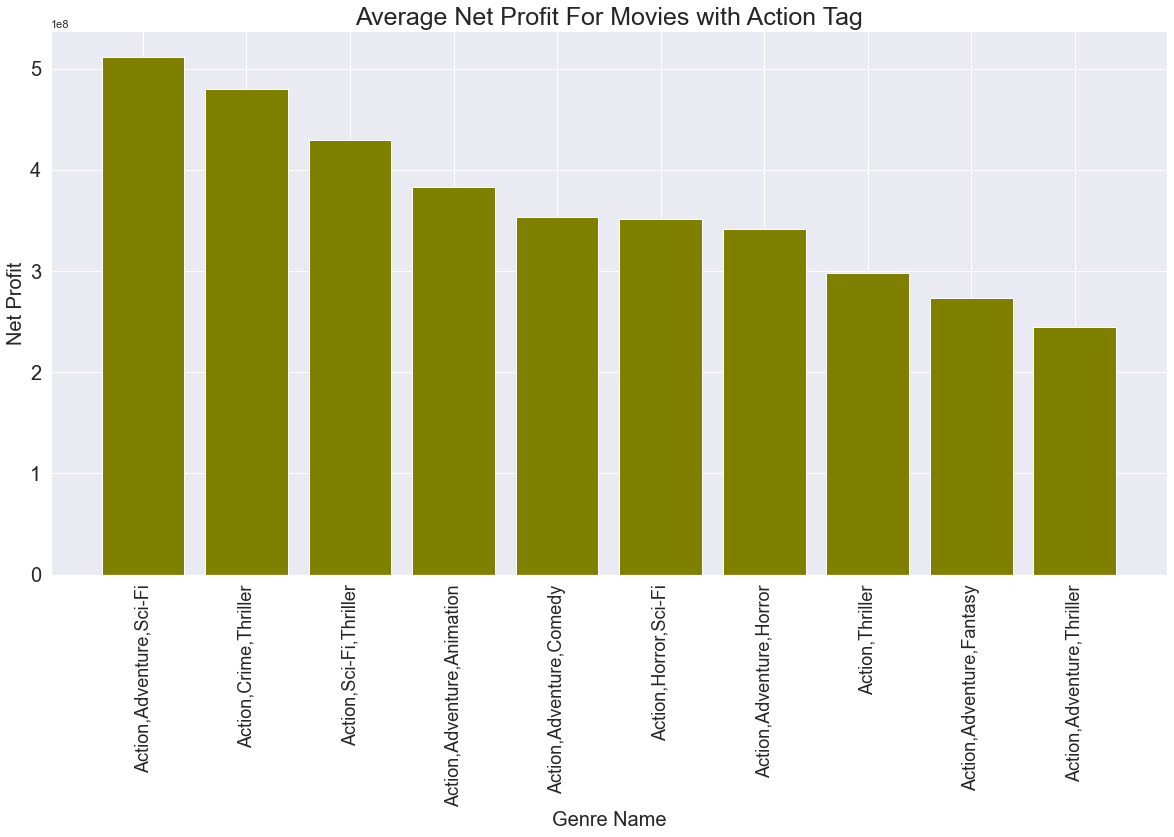

In [126]:
avgnet_profit_action=dict(actiontableau.groupby('genres').net_pre_marketing.mean())
sorted_data = sorted(avgnet_profit_action.items(), key=lambda x: x[1], reverse=True)
avgnet_profit_action_sorted =dict(sorted_data[0:10])
avgnet_profit_action_sorted
plot_two_, plot_two_ax_= plt.subplots(figsize=(20, 10))
plot_two_ax_.bar(avgnet_profit_action_sorted.keys(),avgnet_profit_action_sorted.values(), color = 'olive')
plot_two_ax_.set_title('Average Net Profit For Movies with Action Tag', fontsize=25)
plot_two_ax_.set_ylabel('Net Profit', fontsize=20)
plot_two_ax_.set_xlabel('Genre Name', fontsize=20)

plt.xticks(rotation=90, size=18)
plt.yticks(size = 20);

In [120]:
avgnet_profit_action_sorted

{'Action,Adventure,Sci-Fi': 511433347.79591835,
 'Action,Crime,Thriller': 479543282.8333333,
 'Action,Sci-Fi,Thriller': 429212307.0,
 'Action,Adventure,Animation': 382554265.0769231,
 'Action,Adventure,Comedy': 353457716.4705882,
 'Action,Horror,Sci-Fi': 351530715.0,
 'Action,Adventure,Horror': 341514650.0,
 'Action,Thriller': 298291292.4,
 'Action,Adventure,Fantasy': 273067383.1034483,
 'Action,Adventure,Thriller': 244711709.33333334}

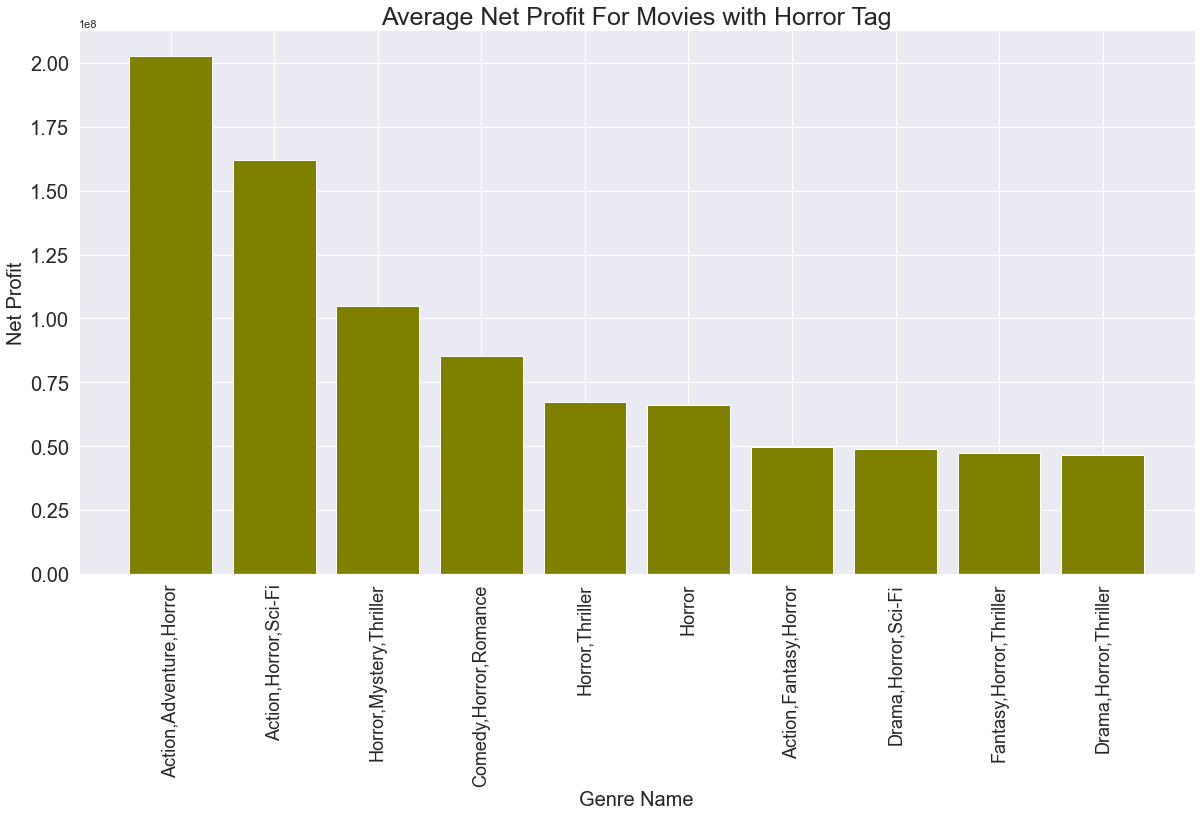

In [117]:
avgnet_profit_horror=dict(horrortableau.groupby('genres').net_pre_marketing.mean())
sorted_data2 = sorted(avgnet_profit_horror.items(), key=lambda x: x[1], reverse=True)
avgnet_profit_horror_sorted =dict(sorted_data2[0:10])
avgnet_profit_horror_sorted
plot_three_, plot_three_ax_= plt.subplots(figsize=(20, 10))
plot_three_ax_.bar(avgnet_profit_horror_sorted.keys(),avgnet_profit_horror_sorted.values(), color = 'olive')
plot_three_ax_.set_title('Average Net Profit For Movies with Horror Tag', fontsize=25)
plot_three_ax_.set_ylabel('Net Profit', fontsize=20)
plot_three_ax_.set_xlabel('Genre Name', fontsize=20)


plt.xticks(rotation=90, size=18);
plt.yticks(size = 20)
plt.xticks();


In [80]:
sorted_data2[0:10]

[('Action,Adventure,Horror', 202640185.0),
 ('Action,Horror,Sci-Fi', 162177890.42857143),
 ('Horror,Mystery,Thriller', 104884438.23333333),
 ('Comedy,Horror,Romance', 85121608.0),
 ('Horror,Thriller', 67481521.48),
 ('Horror', 66284242.85714286),
 ('Action,Fantasy,Horror', 49592588.833333336),
 ('Drama,Horror,Sci-Fi', 48754278.0),
 ('Fantasy,Horror,Thriller', 47452391.5),
 ('Drama,Horror,Thriller', 46600809.4)]

In [84]:
horrortableau = horrortableau.rename(columns = {'earnings/cost_ratio': 'ec_ratio'})
actiontableau = actiontableau.rename(columns = {'earnings/cost_ratio': 'ec_ratio'})

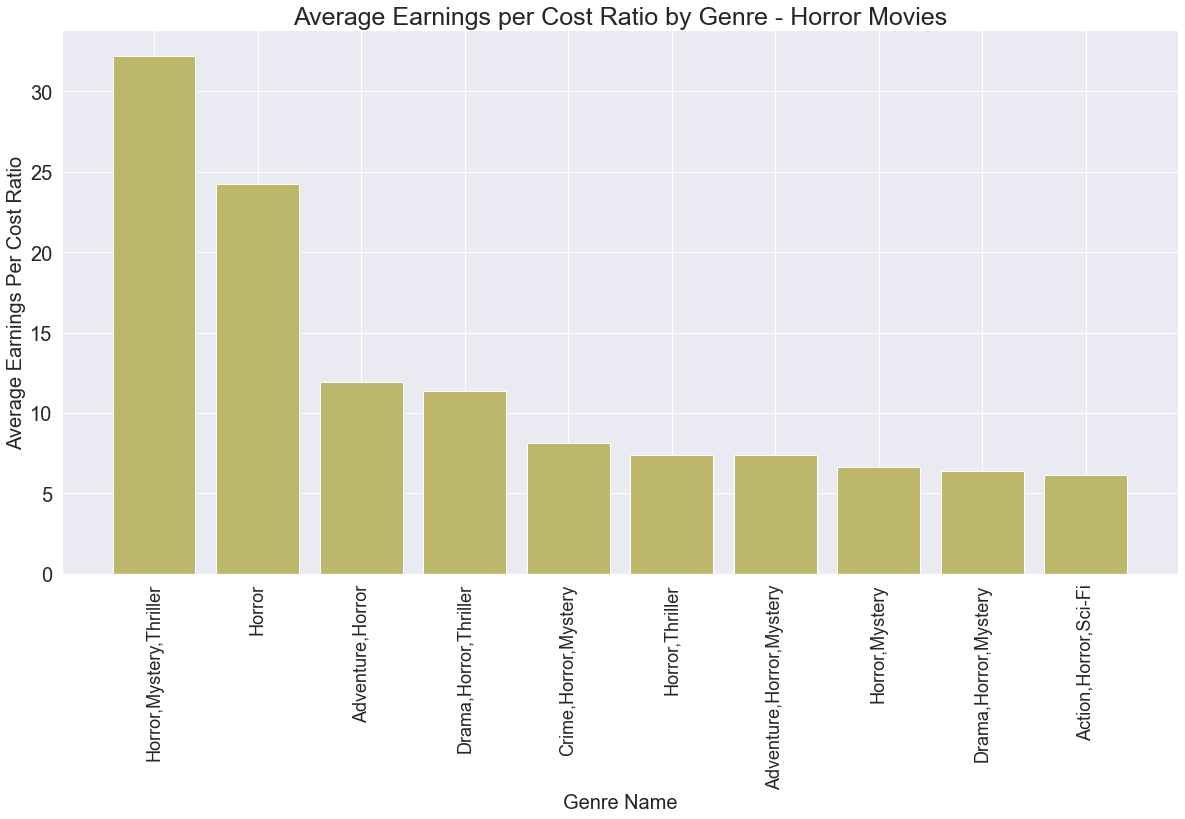

In [124]:
avgnet_ec_horror=dict(horrortableau.groupby('genres').ec_ratio.mean())
sorted_data3 = sorted(avgnet_ec_horror.items(), key=lambda x: x[1], reverse=True)
avgnet_ec_horror_sorted =dict(sorted_data3[0:10])
avgnet_ec_horror_sorted
plot_three1_, plot_three1_ax_= plt.subplots(figsize=(20, 10))
plot_three1_ax_.bar(avgnet_ec_horror_sorted.keys(),avgnet_ec_horror_sorted.values(), color = 'darkkhaki')
plot_three1_ax_.set_title('Average Earnings per Cost Ratio by Genre - Horror Movies', fontsize=25)
plot_three1_ax_.set_ylabel('Average Earnings Per Cost Ratio', fontsize=20)
plot_three1_ax_.set_xlabel('Genre Name', fontsize=20)

plt.xticks(rotation=90, size=18)
plt.yticks(size =20);

In [122]:
avgnet_ec_horror_sorted

{'Horror,Mystery,Thriller': 32.186933333333336,
 'Horror': 24.25857142857143,
 'Adventure,Horror': 11.931,
 'Drama,Horror,Thriller': 11.383600000000001,
 'Crime,Horror,Mystery': 8.157,
 'Horror,Thriller': 7.3952,
 'Adventure,Horror,Mystery': 7.365,
 'Horror,Mystery': 6.67,
 'Drama,Horror,Mystery': 6.383785714285715,
 'Action,Horror,Sci-Fi': 6.170714285714285}

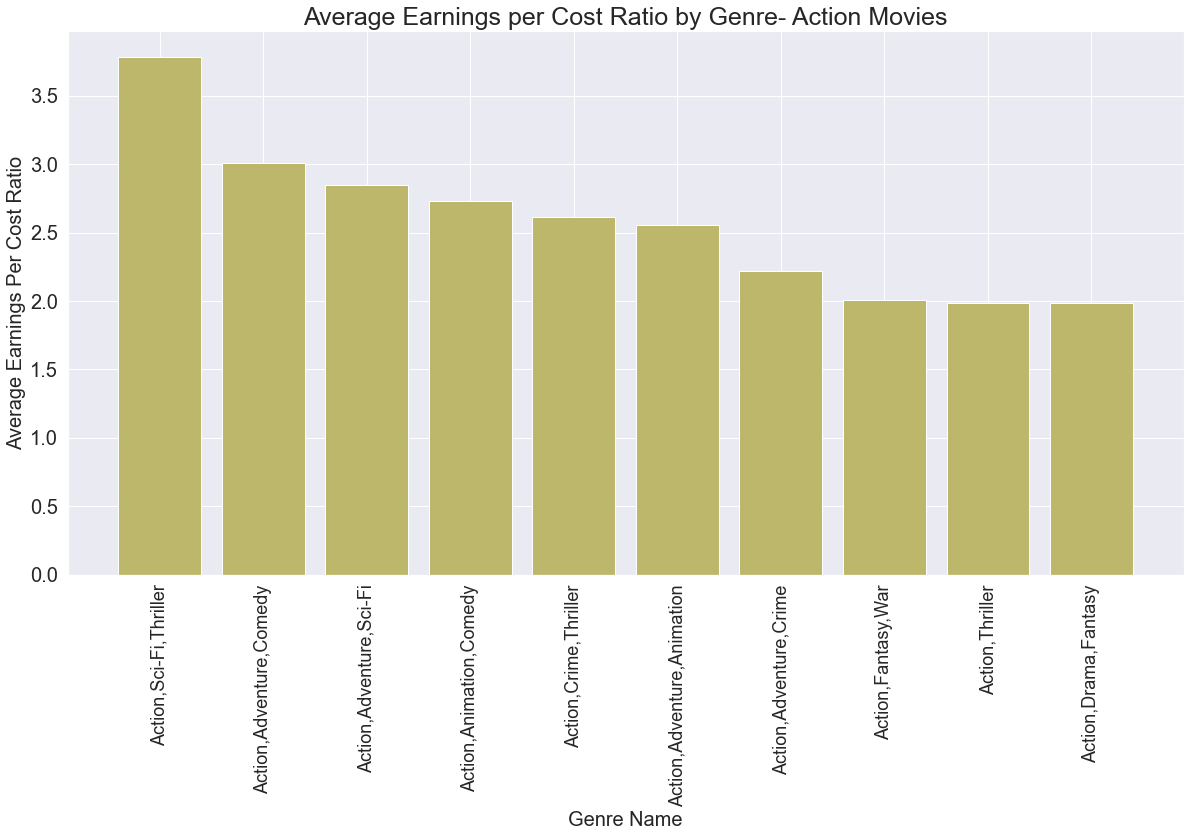

In [123]:
avgnet_ec_action=dict(actiontableau.groupby('genres').ec_ratio.mean())
sorted_data4 = sorted(avgnet_ec_action.items(), key=lambda x: x[1], reverse=True)
avgnet_ec_action_sorted =dict(sorted_data4[0:10])
avgnet_ec_action_sorted
plot_three2_, plot_three2_ax_= plt.subplots(figsize=(20, 10))
plot_three2_ax_.bar(avgnet_ec_action_sorted.keys(),avgnet_ec_action_sorted.values(), color = 'darkkhaki')
plot_three2_ax_.set_title('Average Earnings per Cost Ratio by Genre- Action Movies', fontsize=25)
plot_three2_ax_.set_ylabel('Average Earnings Per Cost Ratio', fontsize=20)
plot_three2_ax_.set_xlabel('Genre Name', fontsize=20)

plt.xticks(rotation=90, size=18)
plt.yticks(size = 20);

In [121]:
avgnet_ec_action_sorted

{'Action,Sci-Fi,Thriller': 3.7834136872413793,
 'Action,Adventure,Comedy': 3.007368328934492,
 'Action,Adventure,Sci-Fi': 2.8474135630197566,
 'Action,Animation,Comedy': 2.7285716940375835,
 'Action,Crime,Thriller': 2.610455238881294,
 'Action,Adventure,Animation': 2.5550275835469427,
 'Action,Adventure,Crime': 2.221889879111111,
 'Action,Fantasy,War': 2.007091372727273,
 'Action,Thriller': 1.9865340848503075,
 'Action,Drama,Fantasy': 1.9835713976190474}

In [89]:
firstq_horrortableau=horrortableau.loc[horrortableau['production_budget']<=4000000]
len(firstq_horrortableau)

43

In [90]:
len(firstq_horrortableau.loc[firstq_horrortableau['ec_ratio']>=1])

23

In [91]:
len(firstq_horrortableau.loc[firstq_horrortableau['ec_ratio']>=1])/len(firstq_horrortableau)

0.5348837209302325

In [92]:
secondq_horrortableau=horrortableau.loc[(horrortableau['production_budget']>4000000) & (horrortableau['production_budget']<=9450000.00)]
secondq_horrortableau

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,ec_ratio,year_released,Profitable?
15,859,tt1082807,6.10,38378.00,The Belko Experiment,2016,89.00,"Horror,Thriller",21.00,"Mar 17, 2017",5000000.00,10166820.00,11792942.00,6792942.00,0.86,1.36,2017.00,True
19,1057,tt1179933,7.20,260383.00,10 Cloverfield Lane,2016,103.00,"Drama,Horror,Mystery",54.00,"Mar 11, 2016",5000000.00,72082999.00,108286422.00,103286422.00,0.67,20.66,2016.00,True
20,1144,tt1204977,4.50,44054.00,Ouija,2014,89.00,"Horror,Mystery,Thriller",60.00,"Oct 24, 2014",5000000.00,50856010.00,103300632.00,98300632.00,0.49,19.66,2014.00,True
27,1561,tt1285009,5.20,21614.00,The Strangers: Prey at Night,2018,85.00,Horror,79.00,"Mar 9, 2018",5000000.00,24431472.00,29960051.00,24960051.00,0.81,4.99,2018.00,True
44,3453,tt1519461,4.20,11537.00,Area 51,2015,91.00,"Horror,Sci-Fi,Thriller",81.00,"May 15, 2015",5000000.00,7556.00,7556.00,-4992444.00,1.00,-1.00,2015.00,False
46,3541,tt1525366,6.30,15727.00,Grabbers,2012,94.00,"Comedy,Horror,Sci-Fi",38.00,"Jul 19, 2013",5300000.00,0.00,440821.00,-4859179.00,0.00,-0.92,2013.00,False
54,4440,tt1582507,5.60,66303.00,House at the End of the Street,2012,101.00,"Drama,Horror,Thriller",73.00,"Sep 21, 2012",6900000.00,31611916.00,44103982.00,37203982.00,0.72,5.39,2012.00,True
65,6527,tt1675192,7.40,83200.00,Take Shelter,2011,121.00,"Drama,Horror,Thriller",9.00,"Sep 30, 2011",4750000.00,1728953.00,4972016.00,222016.00,0.35,0.05,2011.00,False
66,6809,tt1687901,6.50,60215.00,The Awakening,2011,102.00,"Horror,Thriller",4.00,"Aug 17, 2012",4900000.00,95933.00,6924321.00,2024321.00,0.01,0.41,2012.00,False
75,8960,tt1772240,5.20,51427.00,Apollo 18,2011,86.00,"Horror,Mystery,Sci-Fi",94.00,"Sep 2, 2011",5000000.00,17686929.00,26517819.00,21517819.00,0.67,4.30,2011.00,True


In [93]:
len(secondq_horrortableau.loc[secondq_horrortableau['ec_ratio']>=1])/len(secondq_horrortableau)

0.7105263157894737

In [94]:
thirdq_horrortableau=horrortableau.loc[(horrortableau['production_budget']<=20000000.00) & (horrortableau['production_budget']>9450000.00)]
len(thirdq_horrortableau)

41

In [95]:
len(thirdq_horrortableau.loc[thirdq_horrortableau['ec_ratio']>=1])/len(thirdq_horrortableau)

0.6585365853658537

In [96]:
fourthq_horrortableau=horrortableau.loc[horrortableau['production_budget']>20000000.0]
len(fourthq_horrortableau)

40

In [97]:
len(fourthq_horrortableau.loc[fourthq_horrortableau['ec_ratio']>=1])/len(fourthq_horrortableau)

0.575

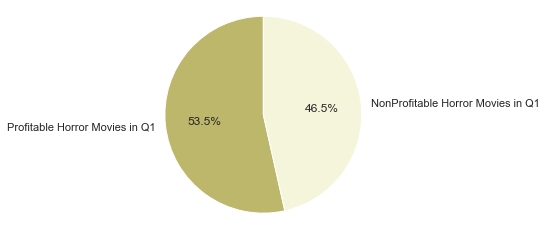

In [98]:
labels = 'Profitable Horror Movies in Q1','NonProfitable Horror Movies in Q1'
sizes = [53.5, 46.5]
explode = (0, 0)  
colors = ['darkkhaki', 'beige']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal');

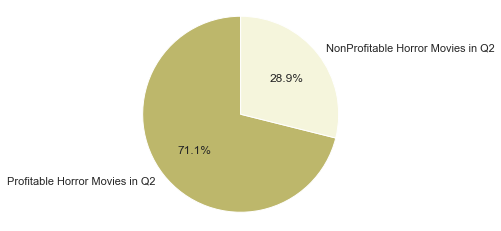

In [99]:
labels = 'Profitable Horror Movies in Q2','NonProfitable Horror Movies in Q2'
sizes = [71.1, 28.9]
explode = (0, 0) 
colors = ['darkkhaki', 'beige']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal');

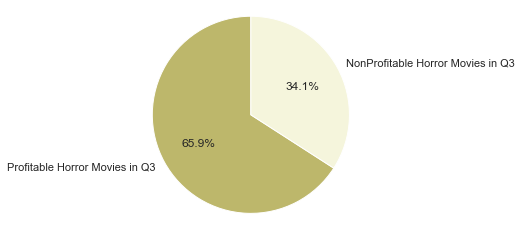

In [103]:
labels = 'Profitable Horror Movies in Q3','NonProfitable Horror Movies in Q3'
sizes = [65.9, 34.1]
explode = (0, 0) 
colors = ['darkkhaki', 'beige']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors )
ax1.axis('equal');

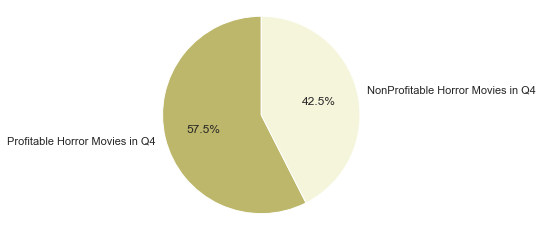

In [102]:
labels = 'Profitable Horror Movies in Q4','NonProfitable Horror Movies in Q4'
sizes = [57.5, 42.5]
explode = (0, 0)  
colors = ['darkkhaki', 'beige']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal');